In [ ]:
!pip install altair 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sqlalchemy import create_engine
!python3 -m pip install PyMySQL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.0 MB/s 


## Read data from Web (XML)

In [ ]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import needed libs

In [ ]:
import urllib.request
from lxml import etree

Send a request to Treasury website to get data. Replace "2017" int the URL parameter for a different year

**We are using 2022 yield rates**

In [ ]:
#Trying new code # Works

import urllib
import xml.etree.ElementTree as ET

url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/pages/xml?data=daily_treasury_yield_curve&field_tdr_date_value=2022'

document = urllib.request.urlopen(url).read()
tree = ET.fromstring(document)


Find nodes using XPath

In [ ]:
new_date = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}NEW_DATE")
tbill3month = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_3MONTH")

len(tbill3month)
#Length is 188 as the year is still going

188

In [ ]:
#GL
new_date = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}NEW_DATE")
tbill1month = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_1MONTH")
tbill3month = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_3MONTH")
tbill6month = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_6MONTH")
tbill1YEAR = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_1YEAR")
tbill2YEAR = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_2YEAR")
tbill3YEAR = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_3YEAR")
tbill5YEAR = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_5YEAR")
tbill7YEAR = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_7YEAR")
tbill10YEAR = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_10YEAR")
tbill20YEAR = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_20YEAR")
tbill30YEAR = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_30YEAR")

In [ ]:
len(tbill30YEAR)

188

In [ ]:
tbill3month[0].text

'0.08'

In [ ]:
new_date[2].text

'2022-01-05T00:00:00'

In [ ]:
for i in range(len(tbill3month)):
  print(tbill3month[i].text)

0.08
0.08
0.09
0.10
0.10
0.13
0.11
0.12
0.12
0.13
0.16
0.17
0.17
0.17
0.19
0.19
0.19
0.20
0.19
0.22
0.19
0.19
0.20
0.23
0.27
0.25
0.26
0.40
0.36
0.43
0.40
0.38
0.36
0.35
0.37
0.34
0.32
0.33
0.35
0.32
0.34
0.38
0.34
0.38
0.36
0.38
0.39
0.40
0.45
0.46
0.44
0.40
0.42
0.54
0.51
0.50
0.52
0.55
0.59
0.55
0.55
0.52
0.53
0.66
0.65
0.67
0.68
0.70
0.77
0.74
0.75
0.79
0.81
0.81
0.82
0.83
0.83
0.91
0.83
0.82
0.82
0.85
0.90
0.91
0.89
0.85
0.85
0.92
0.89
0.91
0.96
1.03
1.07
1.06
1.03
1.05
1.03
1.07
1.06
1.06
1.07
1.08
1.16
1.15
1.17
1.21
1.26
1.26
1.28
1.30
1.39
1.73
1.83
1.74
1.59
1.63
1.70
1.61
1.65
1.73
1.79
1.79
1.78
1.72
1.73
1.90
1.90
1.95
1.98
2.18
2.22
2.39
2.40
2.37
2.50
2.52
2.51
2.48
2.49
2.62
2.55
2.44
2.42
2.41
2.56
2.56
2.52
2.50
2.58
2.65
2.67
2.65
2.62
2.63
2.72
2.70
2.68
2.71
2.74
2.82
2.80
2.82
2.88
2.89
2.97
2.97
2.96
2.97
2.94
3.04
3.07
3.06
3.08
3.17
3.28
3.24
3.22
3.20
3.37
3.35
3.31
3.29
3.24
3.39
3.35
3.40
3.36
3.33


In [ ]:
import pandas as pd
# list comprehension
tbill1month_df = pd.DataFrame([float(rate.text) for rate in tbill1month], columns=['1 Month'])
tbill6month_df = pd.DataFrame([float(rate.text) for rate in tbill6month], columns=['6 Month'])
tbill1Year_df = pd.DataFrame([float(rate.text) for rate in tbill1YEAR], columns=['1 Year'])
tbill2Year_df = pd.DataFrame([float(rate.text) for rate in tbill2YEAR], columns=['2 Year'])
tbill3Year_df = pd.DataFrame([float(rate.text) for rate in tbill3YEAR], columns=['3 Year'])
tbill5Year_df = pd.DataFrame([float(rate.text) for rate in tbill5YEAR], columns=['5 Year'])
tbill7Year_df = pd.DataFrame([float(rate.text) for rate in tbill7YEAR], columns=['7 Year'])
tbill10Year_df = pd.DataFrame([float(rate.text) for rate in tbill10YEAR], columns=['10 Year'])
tbill20Year_df = pd.DataFrame([float(rate.text) for rate in tbill20YEAR], columns=['20 Year'])
tbill30Year_df = pd.DataFrame([float(rate.text) for rate in tbill30YEAR], columns=['30 Year'])


In [ ]:
# list comprehension
date_df = pd.DataFrame([d.text[:10] for d in new_date], columns=['Date'])

date_df = pd.read_sql_query("SELECT date from DataFrame", con)
date_df.head()

In [ ]:
full_df = pd.concat([date_df, tbill1month_df, tbill6month_df,tbill1Year_df,tbill2Year_df,tbill3Year_df,tbill5Year_df,tbill7Year_df,tbill10Year_df,tbill20Year_df,tbill30Year_df ], axis = 1)
full_df.head()

,Date,1 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
0,2022-01-03,0.05,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
1,2022-01-04,0.06,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2,2022-01-05,0.05,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
3,2022-01-06,0.04,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
4,2022-01-07,0.05,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11


**Individual Graphs**

In [ ]:
import matplotlib.pyplot as plt


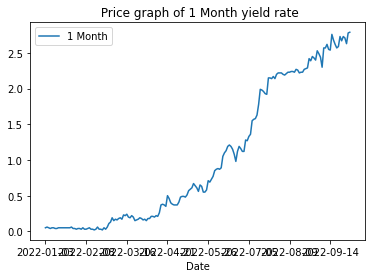

In [ ]:
full_df.plot( x = "Date", y= "1 Month", title = " Price graph of 1 Month yield rate")

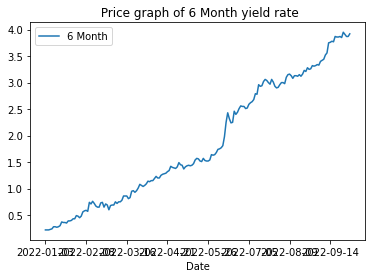

In [ ]:
full_df.plot( x = "Date", y= "6 Month", title = " Price graph of 6 Month yield rate")

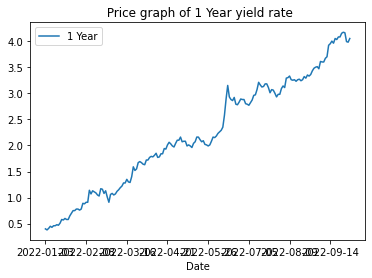

In [ ]:
full_df.plot( x = "Date", y= "1 Year", title = " Price graph of 1 Year yield rate")

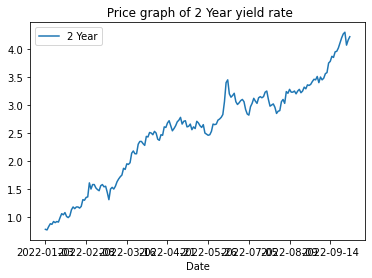

In [ ]:
full_df.plot( x = "Date", y= "2 Year", title = " Price graph of 2 Year yield rate")

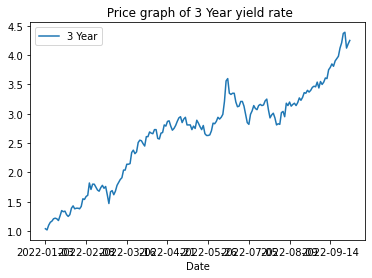

In [ ]:
full_df.plot( x = "Date", y= "3 Year", title = " Price graph of 3 Year yield rate")

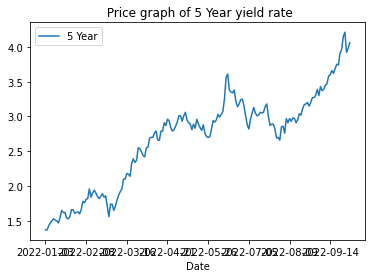

In [ ]:
full_df.plot( x = "Date", y= "5 Year", title = " Price graph of 5 Year yield rate")

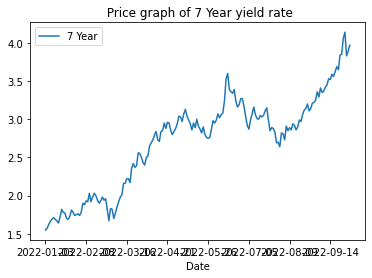

In [ ]:
full_df.plot( x = "Date", y= "7 Year", title = " Price graph of 7 Year yield rate")

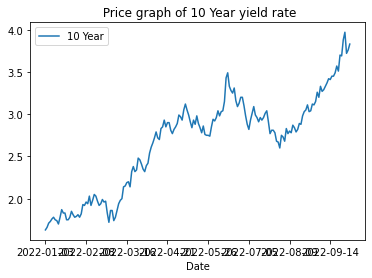

In [ ]:
full_df.plot( x = "Date", y= "10 Year", title = " Price graph of 10 Year yield rate")

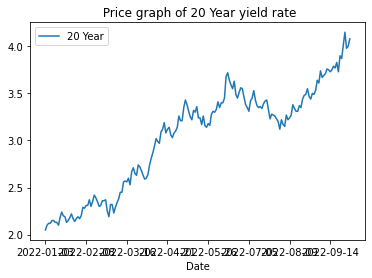

In [ ]:
full_df.plot( x = "Date", y= "20 Year", title = " Price graph of 20 Year yield rate")

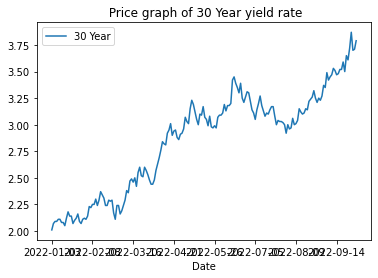

In [ ]:
full_df.plot( x = "Date", y= "30 Year", title = " Price graph of 30 Year yield rate")

**Combined Graph**

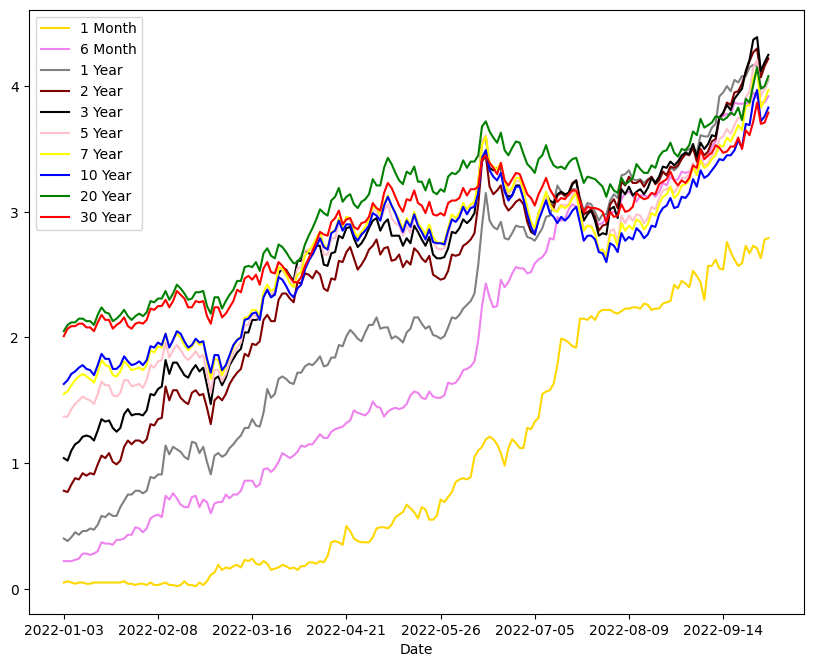

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=100)


ax = plt.gca()
full_df.plot( x = "Date", y= "1 Month", color = "gold", ax = ax)
full_df.plot( x = "Date", y= "6 Month", color = "violet", ax = ax)
full_df.plot( x = "Date", y= "1 Year", color = "grey", ax = ax)
full_df.plot( x = "Date", y= "2 Year", color = "maroon", ax = ax)
full_df.plot( x = "Date", y= "3 Year", color = "black", ax = ax)
full_df.plot( x = "Date", y= "5 Year", color = "pink", ax = ax)
full_df.plot( x = "Date", y= "7 Year", color = "yellow", ax = ax)
full_df.plot( x = "Date", y= "10 Year", color = "blue", ax = ax)
full_df.plot( x = "Date", y= "20 Year", color = "green", ax = ax)
full_df.plot( x = "Date", y= "30 Year", color = "red", ax = ax)

**Convert to SQL**

In [ ]:
engine = create_engine('sqlite://', echo=False)
full_df.to_sql('full_df', con=engine)
engine.execute("SELECT * FROM full_df").fetchall()

[(0, '2022-01-03', 0.05, 0.22, 0.4, 0.78, 1.04, 1.37, 1.55, 1.63, 2.05, 2.01),
 (1, '2022-01-04', 0.06, 0.22, 0.38, 0.77, 1.02, 1.37, 1.57, 1.66, 2.1, 2.07),
 (2, '2022-01-05', 0.05, 0.22, 0.41, 0.83, 1.1, 1.43, 1.62, 1.71, 2.12, 2.09),
 (3, '2022-01-06', 0.04, 0.23, 0.45, 0.88, 1.15, 1.47, 1.66, 1.73, 2.12, 2.09),
 (4, '2022-01-07', 0.05, 0.24, 0.43, 0.87, 1.17, 1.5, 1.69, 1.76, 2.15, 2.11),
 (5, '2022-01-10', 0.05, 0.28, 0.46, 0.92, 1.21, 1.53, 1.71, 1.78, 2.15, 2.11),
 (6, '2022-01-11', 0.04, 0.28, 0.46, 0.9, 1.22, 1.51, 1.69, 1.75, 2.13, 2.08),
 (7, '2022-01-12', 0.04, 0.27, 0.48, 0.92, 1.21, 1.5, 1.67, 1.74, 2.13, 2.08),
 (8, '2022-01-13', 0.05, 0.28, 0.47, 0.91, 1.18, 1.47, 1.64, 1.7, 2.1, 2.05),
 (9, '2022-01-14', 0.05, 0.3, 0.51, 0.99, 1.26, 1.55, 1.72, 1.78, 2.18, 2.12),
 (10, '2022-01-18', 0.05, 0.37, 0.58, 1.06, 1.35, 1.65, 1.82, 1.87, 2.24, 2.18),
 (11, '2022-01-19', 0.05, 0.36, 0.57, 1.04, 1.33, 1.62, 1.78, 1.83, 2.2, 2.14),
 (12, '2022-01-20', 0.05, 0.36, 0.6, 1.08, 1.34,

In [ ]:
##Not required
from sqlalchemy import create_engine

import pymysql

import pandas as pd



tableName   = "full_df"

dataFrame   = pd.DataFrame(data=full_df)           

 

sqlEngine       = create_engine('mysql+pymysql://root:@127.0.0.1/test', pool_recycle=3600)
dbConnection    = sqlEngine.connect()

 

try:

    frame           = dataFrame.to_sql(tableName, dbConnection, if_exists='fail');

except ValueError as vx:

    print(vx)

except Exception as ex:   

    print(ex)

else:

    print("Table %s created successfully."%tableName);   

finally:

    dbConnection.close()

## Read data from Web (JSON)

In [ ]:
import json

In [ ]:
stocks = urllib.request.urlopen('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=demo')
data = json.load(stocks)

Can see that this is a dictionary. A value can also be a dictionary.

In [ ]:
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'MSFT',
  '3. Last Refreshed': '2022-09-30',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2022-09-30': {'1. open': '238.2900',
   '2. high': '240.5400',
   '3. low': '232.7300',
   '4. close': '232.9000',
   '5. volume': '35694832'},
  '2022-09-29': {'1. open': '238.8900',
   '2. high': '239.9500',
   '3. low': '234.4100',
   '4. close': '237.5000',
   '5. volume': '27484233'},
  '2022-09-28': {'1. open': '236.8100',
   '2. high': '242.3300',
   '3. low': '234.7300',
   '4. close': '241.0700',
   '5. volume': '29029679'},
  '2022-09-27': {'1. open': '239.9800',
   '2. high': '241.8000',
   '3. low': '234.5000',
   '4. close': '236.4100',
   '5. volume': '27018732'},
  '2022-09-26': {'1. open': '237.0450',
   '2. high': '241.4500',
   '3. low': '236.9000',
   '4. close': '237.4500',
   '5. volume': '27694190'},
  '2022-09-23': {'1. open': '2

Can get the symbol via its key.

In [ ]:
data['Meta Data']['2. Symbol']

'MSFT'

In [ ]:
data['Time Series (Daily)']['2020-02-14']

{'1. open': '183.2500',
 '2. high': '185.4100',
 '3. low': '182.6500',
 '4. close': '185.3500',
 '5. volume': '23149516'}

How many days in the series?

In [ ]:
len(data['Time Series (Daily)'])

5767

Create a DataFrame for dates

In [ ]:
import pandas as pd
# list comprehension
date_df = pd.DataFrame([day for day in data['Time Series (Daily)']], columns=['Date'])
date_df.head()

,Date
0,2022-09-30
1,2022-09-29
2,2022-09-28
3,2022-09-27
4,2022-09-26


Create a dataframe for price

Open

In [ ]:
import pandas as pd
# list comprehension
open_df = pd.DataFrame([data['Time Series (Daily)'][day]['1. open'] for day in data['Time Series (Daily)']], columns=['Open Price'])
open_df.head()

,Open Price
0,238.2900
1,238.8900
2,236.8100
3,239.9800
4,237.0450


Close df

In [ ]:
close_df = pd.DataFrame([data['Time Series (Daily)'][day]['4. close'] for day in data['Time Series (Daily)']], columns=['Close Price'])
close_df.head()

,Close Price
0,232.9000
1,237.5000
2,241.0700
3,236.4100
4,237.4500


High

In [ ]:
high_df = pd.DataFrame([data['Time Series (Daily)'][day]['2. high'] for day in data['Time Series (Daily)']], columns=['high'])
high_df.head()

,high
0,240.5400
1,239.9500
2,242.3300
3,241.8000
4,241.4500


low

In [ ]:
low_df = pd.DataFrame([data['Time Series (Daily)'][day]['3. low'] for day in data['Time Series (Daily)']], columns=['low'])
low_df.head()

,low
0,232.7300
1,234.4100
2,234.7300
3,234.5000
4,236.9000


Volume

In [ ]:
volume_df = pd.DataFrame([data['Time Series (Daily)'][day]['5. volume'] for day in data['Time Series (Daily)']], columns=['volume'])
volume_df.head()

,volume
0,35694832
1,27484233
2,29029679
3,27018732
4,27694190


In [ ]:
full_price_df = pd.concat([date_df, open_df, low_df, high_df,close_df, volume_df], axis = 1)
full_price_df.head()

,Date,Open Price,low,high,Close Price,volume
0,2022-09-30,238.2900,232.7300,240.5400,232.9000,35694832
1,2022-09-29,238.8900,234.4100,239.9500,237.5000,27484233
2,2022-09-28,236.8100,234.7300,242.3300,241.0700,29029679
3,2022-09-27,239.9800,234.5000,241.8000,236.4100,27018732
4,2022-09-26,237.0450,236.9000,241.4500,237.4500,27694190


We use altair instead of matplotlib for plots. Can only show < 5000 points so here use head() to reduce the number of points to plot; or disble max rows

In [ ]:
import altair as alt
alt.data_transformers.disable_max_rows()
alt.Chart(full_price_df.head(20)).mark_line().encode(x='Date', y='Open Price')

alt.Chart(...)

In [ ]:
alt.data_transformers.disable_max_rows()
alt.Chart(full_price_df.head(20)).mark_line().encode(x='Date', y='Close Price')

alt.Chart(...)

In [ ]:
alt.data_transformers.disable_max_rows()
alt.Chart(full_price_df.head(20)).mark_line().encode(x='Date', y='high')

alt.Chart(...)

In [ ]:
alt.data_transformers.disable_max_rows()
alt.Chart(full_price_df.head(20)).mark_line().encode(x='Date', y='low')

alt.Chart(...)

bin: It is set TRUE to discretized a continuous feature, in order to produce a bar plot.
count: It is a data transformation parameter, which is provided by Altair in order to customize our plots. We can also use other parameters like max, min, average, etc.
Q: Here, Q denotes that the count will a quantitative feature. We can also use N for nominal data or O for ordinal data.

In [ ]:
# https://altair-viz.github.io/user_guide/transform/timeunit.html
import altair as alt
alt.Chart(full_price_df).mark_line().encode(x='month(Date):T', y='mean(Open Price):Q')

alt.Chart(...)

**Converting to SQL**

In [ ]:
engine = create_engine('sqlite://', echo=False)
full_price_df.to_sql('Full_Price_Details', con=engine)
engine.execute("SELECT * FROM Full_Price_Details").fetchall()

[(0, '2022-09-30', '238.2900', '232.7300', '240.5400', '232.9000', '35694832'),
 (1, '2022-09-29', '238.8900', '234.4100', '239.9500', '237.5000', '27484233'),
 (2, '2022-09-28', '236.8100', '234.7300', '242.3300', '241.0700', '29029679'),
 (3, '2022-09-27', '239.9800', '234.5000', '241.8000', '236.4100', '27018732'),
 (4, '2022-09-26', '237.0450', '236.9000', '241.4500', '237.4500', '27694190'),
 (5, '2022-09-23', '239.5400', '235.2000', '241.1300', '237.9200', '34176048'),
 (6, '2022-09-22', '237.8704', '237.5700', '243.8600', '240.9800', '30927092'),
 (7, '2022-09-21', '244.2700', '238.9000', '247.6600', '238.9500', '28625557'),
 (8, '2022-09-20', '242.0650', '239.6400', '243.5100', '242.4500', '26660299'),
 (9, '2022-09-19', '242.4650', '240.8500', '245.1400', '244.5200', '26826931'),
 (10, '2022-09-16', '244.2600', '242.0627', '245.3000', '244.7400', '39791768'),
 (11, '2022-09-15', '249.7700', '244.0200', '251.4000', '245.3800', '31530948'),
 (12, '2022-09-14', '253.5300', '249.8

## Read data from Web (HTML)

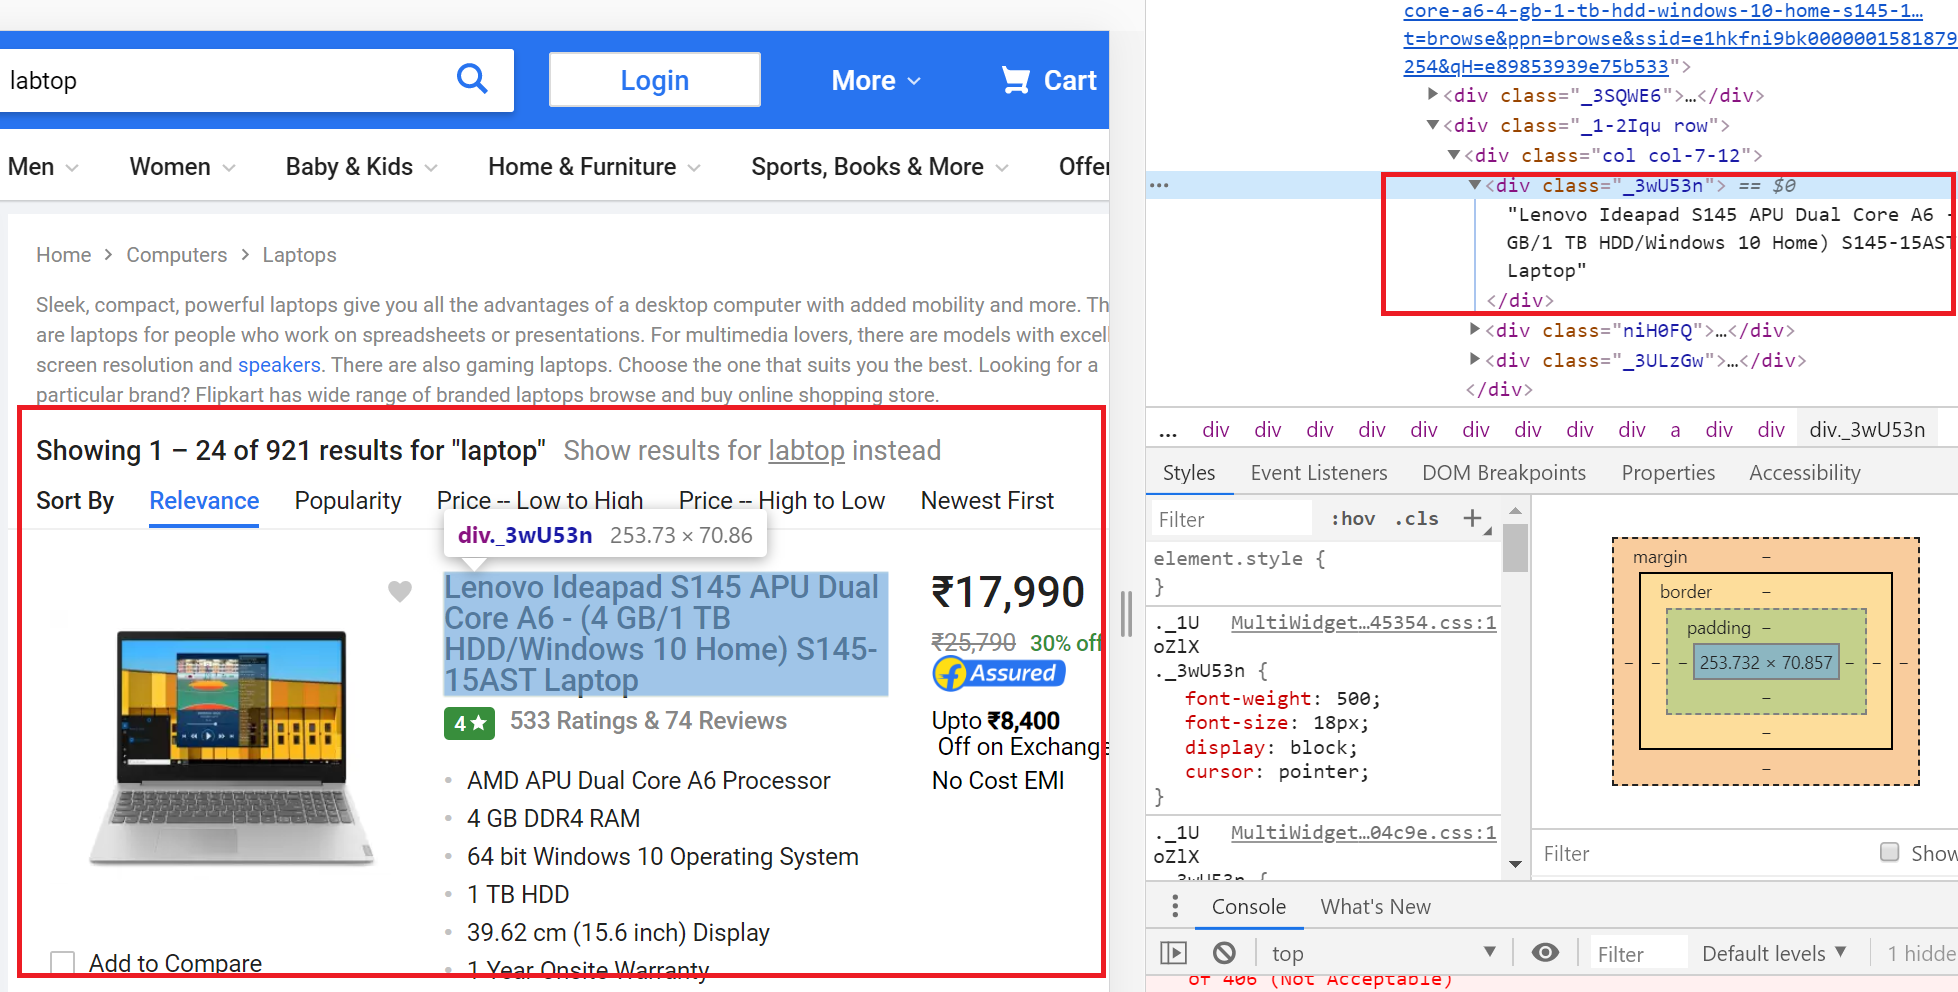

In [ ]:
import urllib.request
from lxml import html
import requests

html_data = urllib.request.urlopen('https://www.flipkart.com/computers/laptops/pr?sid=6bo,b5g&q=labtop&otracker=categorytree').read()

In [ ]:
html_tree = html.fromstring(html_data)



To Get Laptop names

In [ ]:
name = html_tree.xpath("//div[@class='_4rR01T']/text()")
name_df = pd.DataFrame(name, columns = ['Laptop names'])
name_df.head()

,Laptop names
0,ASUS VivoBook 14 (2022) Ryzen 3 Dual Core AMD ...
1,ASUS VivoBook 15 (2022) Core i5 10th Gen - (8 ...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...
3,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...
4,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...


Price of the laptops

In [ ]:
price = html_tree.xpath("//div[@class='_30jeq3 _1_WHN1']/text()")
price_df = pd.DataFrame(price, columns = ['Laptop Price'])
price_df.head()

,Laptop Price
0,"₹26,890"
1,"₹36,890"
2,"₹29,890"
3,"₹47,890"
4,"₹49,890"


In [ ]:
full_laptop_price_df = pd.concat([name_df, price_df], axis = 1)
full_laptop_price_df.head()

,Laptop names,Laptop Price
0,ASUS VivoBook 14 (2022) Ryzen 3 Dual Core AMD ...,"₹26,890"
1,ASUS VivoBook 15 (2022) Core i5 10th Gen - (8 ...,"₹36,890"
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹29,890"
3,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹47,890"
4,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,"₹49,890"


In [ ]:
price = html_tree.xpath("//div[@class='_2Tpdn3']/text()")
delivery_df = pd.DataFrame(price, columns = ['Delivery Option'])
delivery_df.head()

,Delivery Option
0,Free delivery
1,Free delivery
2,Free delivery
3,Free delivery
4,Free delivery


In [ ]:
rating = html_tree.xpath("//div[@class='_3LWZlK']/text()")
Rating_df = pd.DataFrame(rating, columns = ['Rating'])
Rating_df.head()

,Rating
0,4.4
1,4.3
2,4.3
3,4.4
4,4.5


In [ ]:
Processor = html_tree.xpath("//li[1]/text()")
Processor_df = pd.DataFrame(Processor, columns = ['Processor'])
Processor_df.head()

,Processor
0,AMD Ryzen 3 Dual Core Processor
1,Intel Core i5 Processor (10th Gen)
2,Intel Core i3 Processor (10th Gen)
3,Intel Core i5 Processor (10th Gen)
4,AMD Ryzen 5 Hexa Core Processor


In [ ]:
ram = html_tree.xpath("//li[2]/text()")
ram_df = pd.DataFrame(ram, columns = ['RAM'])
ram_df.head()

,RAM
0,8 GB DDR4 RAM
1,8 GB DDR4 RAM
2,8 GB DDR4 RAM
3,8 GB DDR4 RAM
4,8 GB DDR4 RAM


In [ ]:
windows = html_tree.xpath("//li[3]/text()")
windows_df = pd.DataFrame(windows, columns = ['System Clockspeed and OS'])
windows_df.head()

,System Clockspeed and OS
0,64 bit Windows 11 Operating System
1,64 bit Windows 11 Operating System
2,64 bit Windows 11 Operating System
3,Windows 11 Operating System
4,64 bit Windows 10 Operating System


In [ ]:
warranty = html_tree.xpath("//li[7]/text()")
warranty_df = pd.DataFrame(warranty, columns = ['Warranty'])
warranty_df.head()

,Warranty
0,1 Year Onsite Warranty
1,1 Year Onsite Warranty
2,1 Year Onsite Warranty
3,1 Year Onsite Warranty
4,1 Year Onsite Warranty


In [ ]:
SSD = html_tree.xpath("//li[4]/text()")
SSD_df = pd.DataFrame(SSD, columns = ['SSD Memory'])
SSD_df.head()

,SSD Memory
0,256 GB SSD
1,512 GB SSD
2,512 GB SSD
3,512 GB SSD
4,512 GB SSD


Make a common DF

In [ ]:
full_laptop_df = pd.concat([full_laptop_price_df,Rating_df,Processor_df,ram_df,windows_df,warranty_df,SSD_df ], axis = 1)
full_laptop_df.head()

,Laptop names,Laptop Price,Rating,Processor,RAM,System Clockspeed and OS,Warranty,SSD Memory
0,ASUS VivoBook 14 (2022) Ryzen 3 Dual Core AMD ...,"₹26,890",4.4,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 Year Onsite Warranty,256 GB SSD
1,ASUS VivoBook 15 (2022) Core i5 10th Gen - (8 ...,"₹36,890",4.3,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 Year Onsite Warranty,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹29,890",4.3,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 Year Onsite Warranty,512 GB SSD
3,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹47,890",4.4,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,1 Year Onsite Warranty,512 GB SSD
4,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,"₹49,890",4.5,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 Year Onsite Warranty,512 GB SSD


In [ ]:
from sqlalchemy import create_engine
!python3 -m pip install PyMySQL


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
engine = create_engine('sqlite://', echo=False)
full_laptop_df.to_sql('laptops', con=engine)
engine.execute("SELECT * FROM laptops").fetchall()

[(0, 'ASUS VivoBook 14 (2022) Ryzen 3 Dual Core AMD R3-3250U - (8 GB/256 GB SSD/Windows 11 Home) M515DA-BR32...', '₹26,890', '4.4', 'AMD Ryzen 3 Dual Core Processor', '8 GB DDR4 RAM', '64 bit Windows 11 Operating System', '1 Year Onsite Warranty', '256 GB SSD'),
 (1, 'ASUS VivoBook 15 (2022) Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ562WS | X515JA-E...', '₹36,890', '4.3', 'Intel Core i5 Processor (10th Gen)', '8 GB DDR4 RAM', '64 bit Windows 11 Operating System', '1 Year Onsite Warranty', '512 GB SSD'),
 (2, 'ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...', '₹29,890', '4.3', 'Intel Core i3 Processor (10th Gen)', '8 GB DDR4 RAM', '64 bit Windows 11 Operating System', '1 Year Onsite Warranty', '512 GB SSD'),
 (3, 'ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...', '₹47,890', '4.4', 'Intel Core i5 Processor (10th Gen)', '8 GB DDR4 RAM', 'Windows 11 Operat